# LBNL Baseline Dataset Reading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Read in Data

In [2]:
real_data = pd.read_csv("../data/lbnl/real_ahu.csv")
real_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,75.92,55,80.61,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
1,8/28/2007 0:01,75.71,55,80.68,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
2,8/28/2007 0:02,75.71,55,80.66,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
3,8/28/2007 0:03,75.60,55,80.69,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
4,8/28/2007 0:04,75.81,55,80.60,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,5/31/2009 23:55,66.88,55,67.31,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21596,5/31/2009 23:56,66.77,55,67.29,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21597,5/31/2009 23:57,66.88,55,67.23,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21598,5/31/2009 23:58,66.99,55,67.21,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0


In [3]:
simulated_data = pd.read_csv("../data/lbnl/simulated_ahu.csv")
simulated_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,77.13,55,80.61,75.86,75.19,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.06,0,1
1,8/28/2007 0:01,77.63,55,80.68,75.38,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.17,0,1
2,8/28/2007 0:02,77.87,55,80.66,75.28,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.34,0,1
3,8/28/2007 0:03,77.95,55,80.69,75.27,75.20,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.57,0,1
4,8/28/2007 0:04,78.59,55,80.60,75.29,75.24,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,1.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,5/15/2009 23:55,62.56,55,55.62,55.62,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37436,5/15/2009 23:56,62.55,55,55.59,55.59,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37437,5/15/2009 23:57,62.54,55,55.50,55.50,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37438,5/15/2009 23:58,62.52,55,55.49,55.49,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0


In [4]:
simulated_data['Fault Detection Ground Truth']

0        1
1        1
2        1
3        1
4        1
        ..
37435    0
37436    0
37437    0
37438    0
37439    0
Name: Fault Detection Ground Truth, Length: 37440, dtype: int64

In [5]:
from collections import Counter
Counter(simulated_data['Fault Detection Ground Truth'])


Counter({1: 18720, 0: 18720})

In [6]:
from collections import Counter
Counter(real_data['Fault Detection Ground Truth'])

Counter({1: 2880, 0: 18720})

## Inspecting Dates Available

In [4]:
real_data['Datetime'] = pd.to_datetime(real_data['Datetime'])
simulated_data['Datetime'] = pd.to_datetime(simulated_data['Datetime'])

In [8]:
np.unique(real_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2008, 8, 19),
       datetime.date(2008, 8, 25), datetime.date(2008, 9, 4),
       datetime.date(2009, 1, 19), datetime.date(2009, 2, 16),
       datetime.date(2009, 2, 17), datetime.date(2009, 5, 3),
       datetime.date(2009, 5, 4), datetime.date(2009, 5, 5),
       datetime.date(2009, 5, 6), datetime.date(2009, 5, 30),
       datetime.date(2009, 5, 31)], dtype=object)

The last two dates are not given in the dataset description. Since we cannot be sure whether they are faulty, let's drop them.

In [5]:
unknown_dates = ['2009-5-31', '2009-5-30'] 

for unknown_date in unknown_dates:
    real_data = real_data[real_data['Datetime'].dt.date != pd.to_datetime(unknown_date).date()]

In [10]:
np.unique(real_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2008, 8, 19),
       datetime.date(2008, 8, 25), datetime.date(2008, 9, 4),
       datetime.date(2009, 1, 19), datetime.date(2009, 2, 16),
       datetime.date(2009, 2, 17), datetime.date(2009, 5, 3),
       datetime.date(2009, 5, 4), datetime.date(2009, 5, 5),
       datetime.date(2009, 5, 6)], dtype=object)

In [11]:
np.unique(simulated_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2007, 8, 31),
       datetime.date(2007, 9, 1), datetime.date(2007, 9, 2),
       datetime.date(2007, 9, 5), datetime.date(2007, 9, 6),
       datetime.date(2008, 2, 12), datetime.date(2008, 5, 6),
       datetime.date(2008, 5, 7), datetime.date(2008, 5, 8),
       datetime.date(2008, 5, 15), datetime.date(2008, 8, 27),
       datetime.date(2008, 8, 28), datetime.date(2008, 8, 29),
       datetime.date(2008, 8, 30), datetime.date(2008, 8, 31),
       datetime.date(2008, 9, 1), datetime.date(2008, 9, 4),
       datetime.date(2008, 9, 5), datetime.date(2009, 2, 11),
       datetime.date(2009, 5, 6), datetime.date(2009, 5, 7),
       datetime.date(2009, 5, 8), datetime.date(2009, 5, 15)],
      dtype=object)

Add unique IDs to each date to make sequencing the data easier

In [6]:
def add_id(df):
    df['date'] = df['Datetime'].dt.date
    df['ID'] = pd.factorize(df['date'])[0]
    df.drop('date', axis=1, inplace=True)
    
    return df

In [7]:
real_data = add_id(real_data)
simulated_data = add_id(simulated_data)

## Select only normal labels

In [8]:
real_data_normal = real_data[real_data['Fault Detection Ground Truth'] == 0]
simulated_data_normal = simulated_data[simulated_data['Fault Detection Ground Truth'] == 0]

## Selecting Features

In [17]:
real_data.columns

Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Set Point', 'AHU: Outdoor Air Temperature',
       'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature',
       'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Return Air Fan Speed Control Signal',
       'AHU: Exhaust Air Damper Control Signal  ',
       'AHU: Outdoor Air Damper Control Signal  ',
       'AHU: Return Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal',
       'AHU: Supply Air Duct Static Pressure Set Point',
       'AHU: Supply Air Duct Static Pressure ', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth', 'ID', 'hour'],
      dtype='object')

In [9]:
simulated_y = simulated_data['Fault Detection Ground Truth']
real_y = real_data['Fault Detection Ground Truth']

In [10]:
non_x_columns = ['Datetime', 'Fault Detection Ground Truth', 'ID']
kept_columns = [c for c in real_data.columns if c not in non_x_columns]

real_X = real_data[kept_columns]
simulated_X = simulated_data[kept_columns]

In [11]:
real_normal_X = real_data_normal[kept_columns]
simulated_normal_X = simulated_data_normal[kept_columns]

## Normalizing Data

In [12]:
real_scaler = MinMaxScaler() # assuming you train on simulated and test on real. You will need to change this if you switch
simulated_normal_X = real_scaler.fit_transform(simulated_normal_X)
real_normal_X = real_scaler.transform(real_normal_X)
real_X = real_scaler.transform(real_X)

## Sequencing Data

In [13]:
def sequence_data(df, ids, timestep=10):
    sequenced_data = []
    
    np_df = np.array(df)
    id_array = np.array(ids)
    
    for i in range(timestep, len(id_array)):
        if id_array[i-timestep] == id_array[i]:
            sequenced_data.append(np_df[i-timestep:i])
            
    return np.array(sequenced_data)

In [14]:
num_timestep = 10
sequenced_real = sequence_data(real_normal_X, real_data_normal['ID'], timestep=num_timestep)
sequenced_simulated = sequence_data(simulated_normal_X, simulated_data_normal['ID'], timestep=num_timestep)

In [15]:
print(f'Unsequenced real shape {real_normal_X.shape}')
print(f'Sequenced real shape {sequenced_real.shape}')
print(f'Unsequenced simulated shape {simulated_normal_X.shape}')
print(f'Sequenced simluated shape {sequenced_simulated.shape}')

Unsequenced real shape (15840, 17)
Sequenced real shape (15730, 10, 17)
Unsequenced simulated shape (18720, 17)
Sequenced simluated shape (18590, 10, 17)


Let's check that the sequence makes sense for peace of mind.

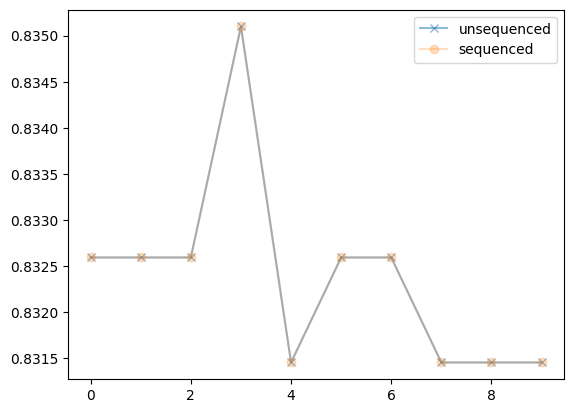

In [16]:
plt.plot(real_normal_X[0:10,3], alpha=0.5, marker='x', label='unsequenced')
plt.plot(sequenced_real[0,0:10,3], alpha=0.25, marker='o', label='sequenced')
plt.legend()

## Autoencoder setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mpl.rcParams['figure.figsize'] = (10, 5)
mpl.rcParams['axes.grid'] = False

In [18]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import numpy as np

# regulization: L1, L2
# cross-validation selecting the hyperparameters


def create_autoencoder(hidden_units, input_shape):
    input_layer = Input(shape=(input_shape,))
    encoded = Dense(hidden_units, activation='relu')(input_layer)
    decoded = Dense(input_shape, activation='sigmoid')(encoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mae')
    
    return autoencoder

hidden_units = [32]
best_autoencoder = None
best_loss = float('inf')

In [19]:
input_shape = simulated_normal_X.shape[1]  # Get the number of features/columns in the training data

for units in hidden_units:
    autoencoder = create_autoencoder(units, input_shape)
    
    history = autoencoder.fit(
        simulated_normal_X, simulated_normal_X,
        epochs=50,
        batch_size=24,
        shuffle=True,
        validation_data=(real_normal_X, real_normal_X),
        verbose=1 
    )
    
    val_loss = np.min(history.history['val_loss'])
    if val_loss < best_loss:
        best_loss = val_loss
        best_autoencoder = autoencoder

print("Best validation loss: ", best_loss)

Epoch 1/50
780/780 [==============================] - 3s 3ms/step - loss: 0.0784 - val_loss: 0.1310
Epoch 2/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0192 - val_loss: 0.1259
Epoch 3/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0147 - val_loss: 0.1227
Epoch 4/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0130 - val_loss: 0.1212
Epoch 5/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0121 - val_loss: 0.1192
Epoch 6/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0114 - val_loss: 0.1195
Epoch 7/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0109 - val_loss: 0.1191
Epoch 8/50
780/780 [==============================] - 2s 2ms/step - loss: 0.0105 - val_loss: 0.1185
Epoch 9/50
780/780 [==============================] - 3s 3ms/step - loss: 0.0102 - val_loss: 0.1180
Epoch 10/50
780/780 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.1188

585/585 [==============================] - 0s 591us/step


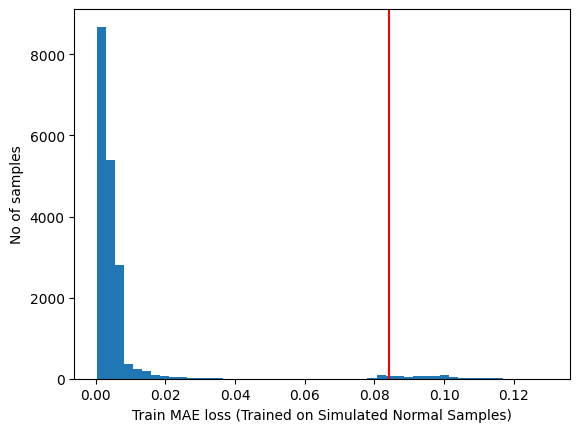

Reconstruction error threshold:  0.08428758679351407


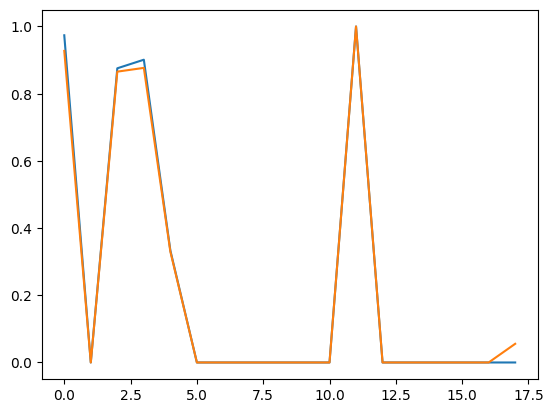

In [37]:
import matplotlib.pyplot as plt

X_train_pred = best_autoencoder.predict(simulated_normal_X)

train_mae_loss = np.mean(np.abs(X_train_pred - simulated_normal_X), axis=1)

threshold = np.percentile(train_mae_loss, 97)


plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss (Trained on Simulated Normal Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

print("Reconstruction error threshold: ", threshold)

# Checking how the first sequence is learnt
plt.plot(simulated_normal_X[0])
plt.plot(X_train_pred[0])
plt.show()

495/495 [==============================] - 0s 520us/step


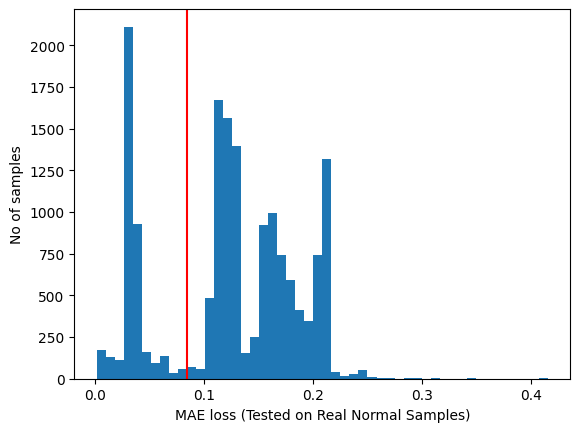

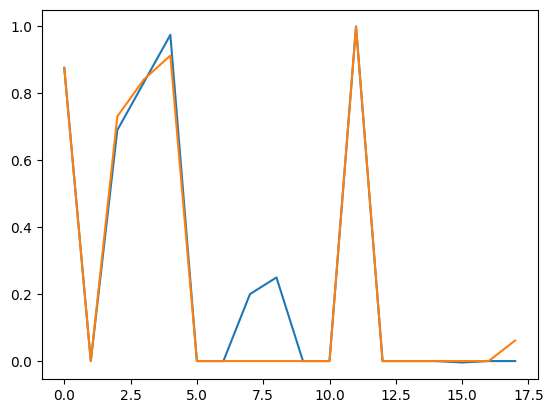

In [38]:
X_test_pred = best_autoencoder.predict(real_normal_X)

test_mae_loss = np.mean(np.abs(X_test_pred-real_normal_X), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel("MAE loss (Tested on Real Normal Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

plt.plot(real_normal_X[0])
plt.plot(X_test_pred[0])
plt.show()


585/585 [==============================] - 0s 636us/step


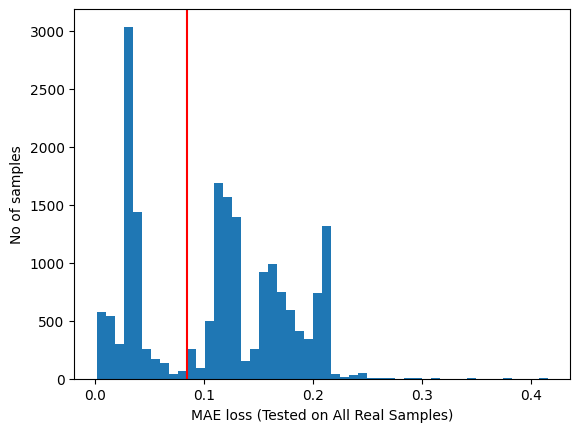

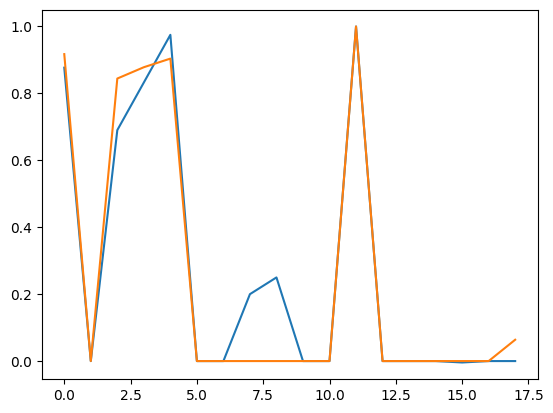

In [39]:
X_test_pred = best_autoencoder.predict(real_X)

test_mae_loss = np.mean(np.abs(X_test_pred-real_X), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel("MAE loss (Tested on All Real Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

plt.plot(real_normal_X[0])
plt.plot(X_test_pred[0])
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

real_predict_y = (test_mae_loss > threshold).astype(int)

conf_matrix = confusion_matrix(real_y, real_predict_y)
accuracy = accuracy_score(real_y, real_predict_y)

print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy:", accuracy)

Confusion Matrix:
[[ 3935 11905]
 [ 2621   259]]

Accuracy: 0.22403846153846155


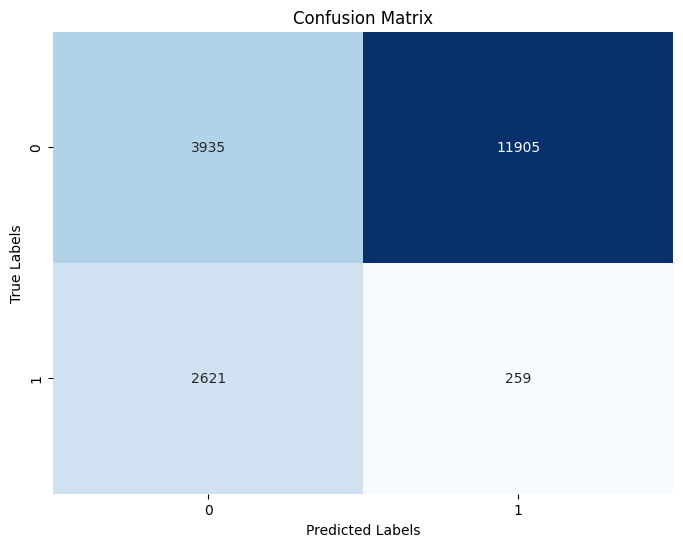

In [43]:
def plot_confusion_matrix(cm, labels):
    
    plt.figure(figsize=(8, 6))
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

labels = [0, 1]  # 0 for normal, 1 for anomaly
plot_confusion_matrix(conf_matrix, labels)